In [35]:
conda install scikit-learn

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Camila\Anaconda3\envs\pdi

  added / updated specs:
    - scikit-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    joblib-0.13.2              |           py37_0         365 KB
    mkl-service-2.0.2          |   py37he774522_0          63 KB
    scikit-learn-0.21.2        |   py37h6288b17_0         5.9 MB
    ------------------------------------------------------------
                                           Total:         6.3 MB

The following NEW packages will be INSTALLED:

  joblib             pkgs/main/win-64::joblib-0.13.2-py37_0
  mkl-service        pkgs/main/win-64::mkl-service-2.0.2-py37he774522_0
  scikit-learn       pkgs/main/win-64::scikit-learn-0.21.2-py37h6288b17_0

The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates    conda-forge::ca



==> WARNING: A newer version of conda exists. <==
  current version: 4.6.11
  latest version: 4.7.10

Please update conda by running

    $ conda update -n base -c defaults conda




In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import numpy as np # linear algebra
import os # accessing directory structure

In [14]:
data = pd.read_csv('jm1.csv')
data.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2,2,2,2,1.2,1.2,1.2,1.2,1.4,False
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1,1,1,1,1,1,True
2,72.0,7.0,1.0,6.0,198.0,1134.13,0.05,20.31,55.85,23029.10,...,51,10,8,1,17,36,112,86,13,True
3,190.0,3.0,1.0,3.0,600.0,4348.76,0.06,17.06,254.87,74202.67,...,129,29,28,2,17,135,329,271,5,True
4,37.0,4.0,1.0,4.0,126.0,599.12,0.06,17.19,34.86,10297.30,...,28,1,6,0,11,16,76,50,7,True


### Descrição dos Atributos
loc : numeric % McCabe’s line count of code <br> 
v(g) : numeric % McCabe “cyclomatic complexity” <br> 
ev(g) : numeric % McCabe “essential complexity” <br> 
iv(g) : numeric % McCabe “design complexity” <br> 
n : numeric % Halstead total operators + operands <br> 
v : numeric % Halstead “volume” <br> 
l : numeric % Halstead “program length” <br> 
d : numeric % Halstead “difficulty” <br> 
i : numeric % Halstead “intelligence” <br> 
e : numeric % Halstead “effort” <br> 
b : numeric % Halstead <br> 
t : numeric % Halstead’s time estimator <br> 
lOCode : numeric % Halstead’s line count <br> 
lOComment : numeric % Halstead’s count of lines of comments <br> 
lOBlank : numeric % Halstead’s count of blank lines <br> 
lOCodeAndComment: numeric <br> 
uniq_Op : numeric % unique operators <br> 
uniq_Opnd : numeric % unique operands <br> 
total_Op : numeric % total operators <br> 
total_Opnd : numeric % total operands 21: branchCount : numeric % of the flow graph <br> 
defects : {false,true} % module has/has not one or more reported defects <br> 

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10885 entries, 0 to 10884
Data columns (total 22 columns):
loc                  10885 non-null float64
v(g)                 10885 non-null float64
ev(g)                10885 non-null float64
iv(g)                10885 non-null float64
n                    10885 non-null float64
v                    10885 non-null float64
l                    10885 non-null float64
d                    10885 non-null float64
i                    10885 non-null float64
e                    10885 non-null float64
b                    10885 non-null float64
t                    10885 non-null float64
lOCode               10885 non-null int64
lOComment            10885 non-null int64
lOBlank              10885 non-null int64
locCodeAndComment    10885 non-null int64
uniq_Op              10885 non-null object
uniq_Opnd            10885 non-null object
total_Op             10885 non-null object
total_Opnd           10885 non-null object
branchCount          10

In [5]:
data.describe()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,b,t,lOCode,lOComment,lOBlank,locCodeAndComment
count,10885.000000,10885.000000,10885.000000,10885.000000,10885.000000,10885.000000,10885.000000,10885.000000,10885.000000,1.088500e+04,10885.000000,1.088500e+04,10885.000000,10885.000000,10885.00000,10885.000000
mean,42.016178,6.348590,3.401047,4.001599,114.389738,673.758017,0.135335,14.177237,29.439544,3.683637e+04,0.224766,2.046465e+03,26.252274,2.737529,4.62554,0.370785
std,76.593332,13.019695,6.771869,9.116889,249.502091,1938.856196,0.160538,18.709900,34.418313,4.343678e+05,0.646408,2.413154e+04,59.611201,9.008608,9.96813,1.907969
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.00000,0.000000
25%,11.000000,2.000000,1.000000,1.000000,14.000000,48.430000,0.030000,3.000000,11.860000,1.619400e+02,0.020000,9.000000e+00,4.000000,0.000000,0.00000,0.000000
50%,23.000000,3.000000,1.000000,2.000000,49.000000,217.130000,0.080000,9.090000,21.930000,2.031020e+03,0.070000,1.128300e+02,13.000000,0.000000,2.00000,0.000000
75%,46.000000,7.000000,3.000000,4.000000,119.000000,621.480000,0.160000,18.900000,36.780000,1.141643e+04,0.210000,6.342500e+02,28.000000,2.000000,5.00000,0.000000
max,3442.000000,470.000000,165.000000,402.000000,8441.000000,80843.080000,1.300000,418.200000,569.780000,3.107978e+07,26.950000,1.726655e+06,2824.000000,344.000000,447.00000,108.000000


In [16]:
data['defects'].value_counts()

False    8779
True     2106
Name: defects, dtype: int64

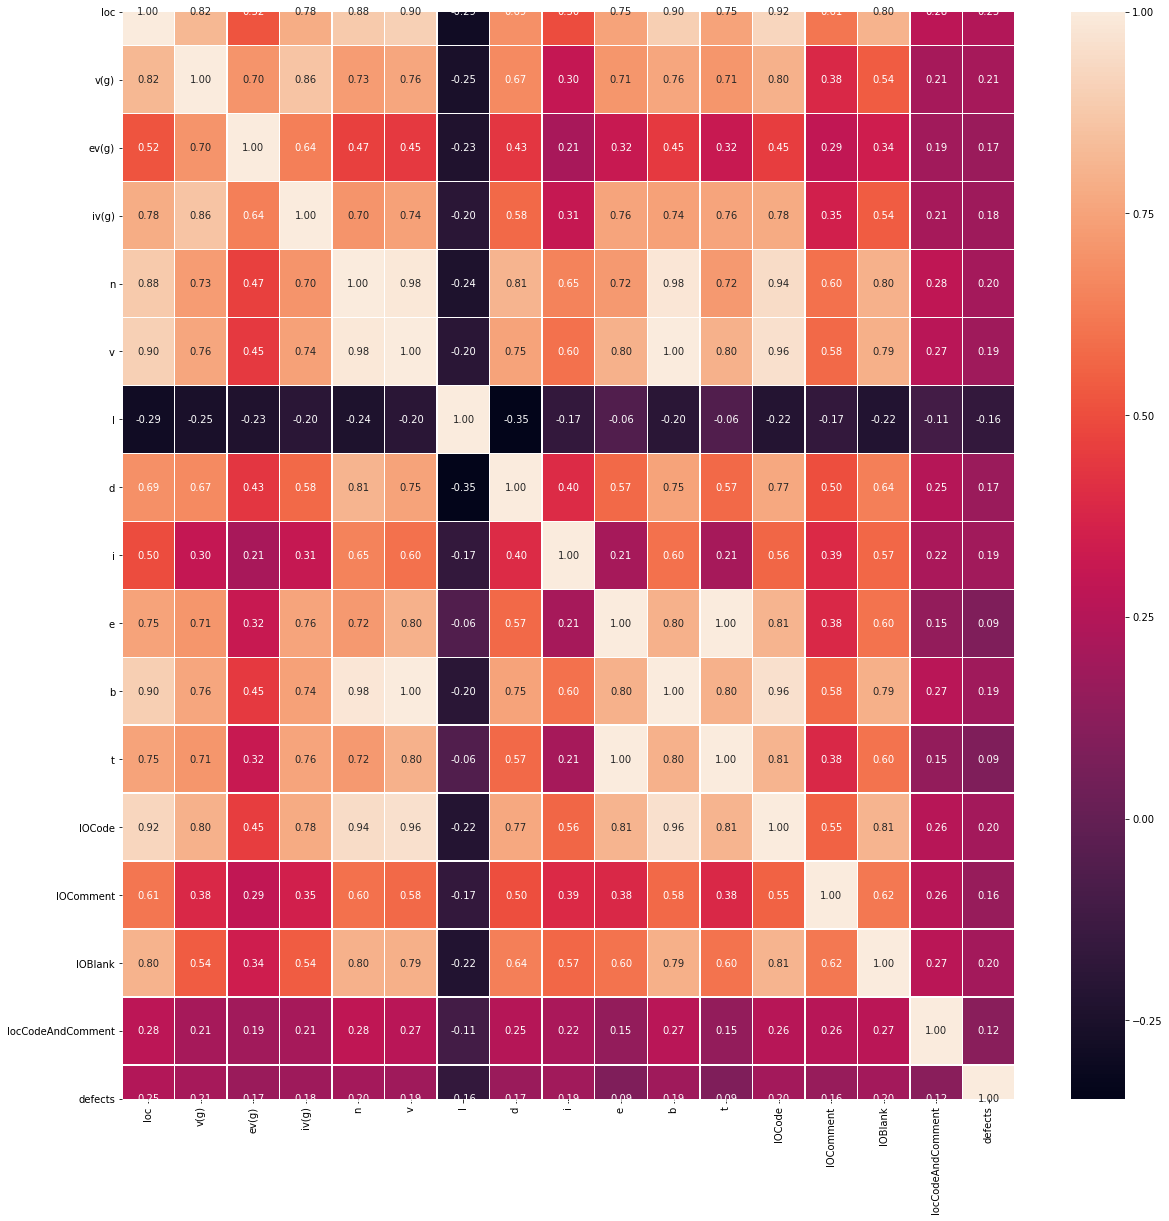

In [21]:
f,ax = plt.subplots(figsize = (20, 20))
sns.heatmap(data.corr(), annot = True, linewidths = .5, fmt = '.2f')
plt.show()

In [39]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

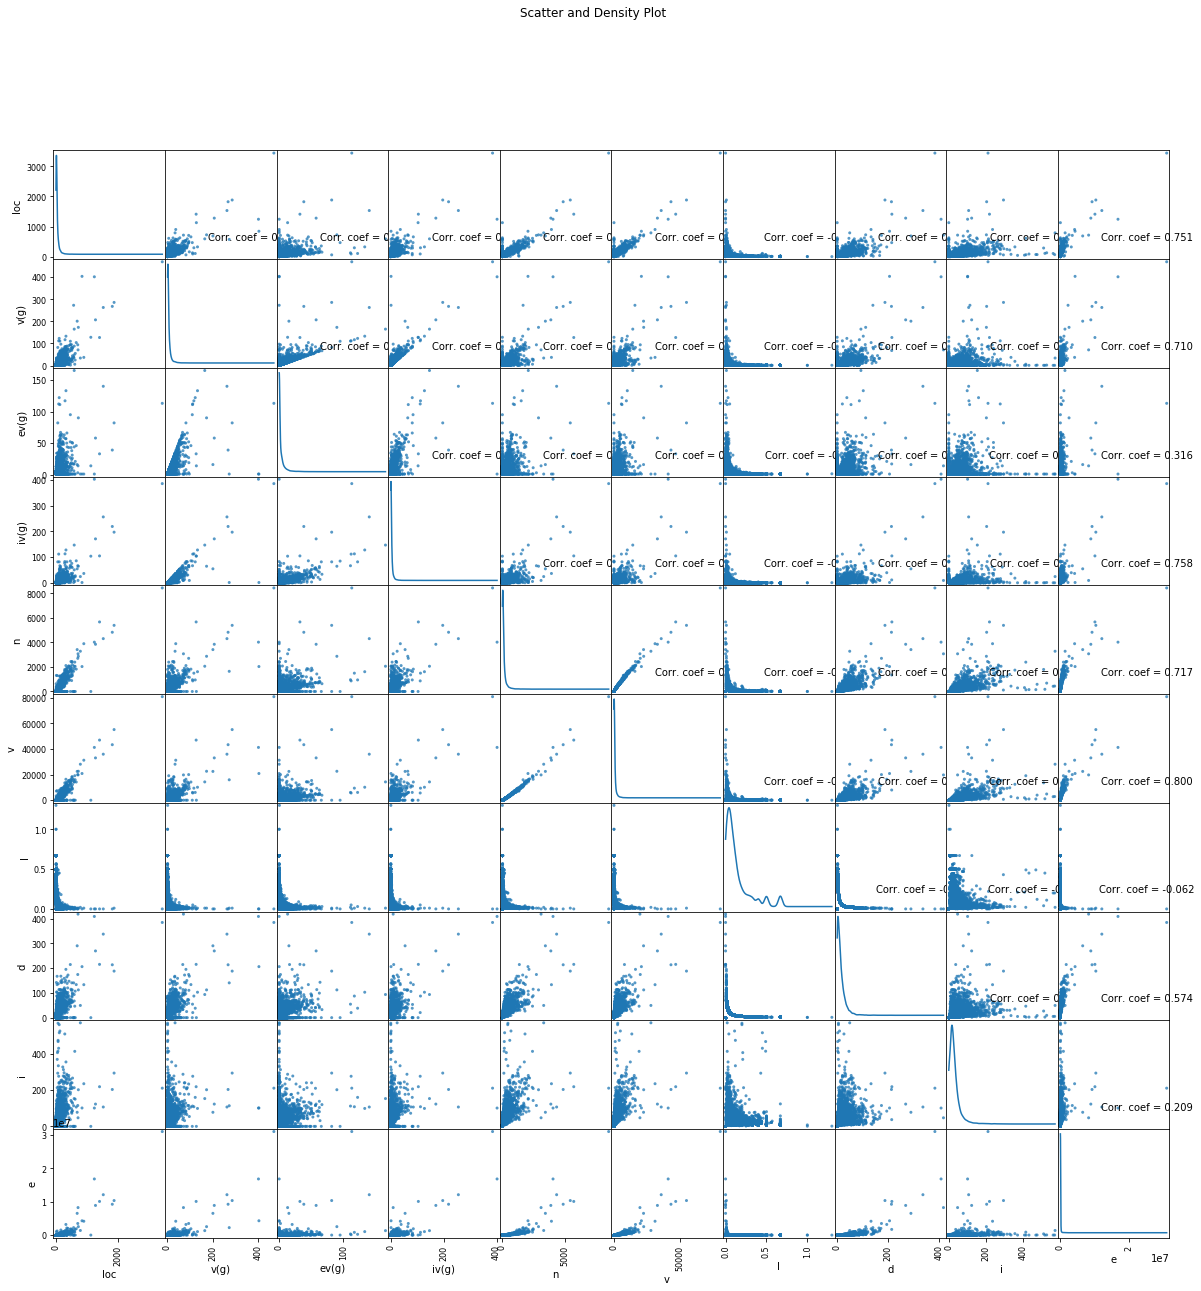

In [41]:
plotScatterMatrix(data, 20, 10)